<a href="https://colab.research.google.com/github/Fathi146/Data-Science/blob/main/P146216_STQD6324_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Expo 2007 - Airline on-time Performance Analysis**

In this assignment, we are going to perform data analysis on Airline on time performance from data expo 2007. We will be using Hive to extract insights from the datasets, and generate visualization using Python program.

The data is collected from the link: https://tinyurl.com/u8rzvdsx

We will be using the data specifically from the year 2007.

The 4 file namely 2007.csv, airports.csv, carriers.csv and plane-data.csv is uploaded to the hdfs environment under the respective folder namely flight_data, airports, carriers and planes.

# **Table Creation**

We then uses the hive sql queries to create a table in the hive environment. Below are the queries code to create the table:

**flight_data**



```
CREATE EXTERNAL TABLE IF NOT EXISTS Flight_Data (
  Year STRING,
  Month STRING,
  DayofMonth STRING,
  DayOfWeek STRING,
  DepTime STRING,
  CRSDepTime STRING,
  ArrTime STRING,
  CRSArrTime STRING,
  UniqueCarrier STRING,
  FlightNum STRING,
  TailNum STRING,
  ActualElapsedTime INT,
  CRSElapsedTime INT,
  AirTime INT,
  ArrDelay INT,
  DepDelay INT,
  Origin STRING,
  Dest STRING,
  Distance INT,
  TaxiIn INT,
  TaxiOut INT,
  Cancelled STRING,
  CancellationCode STRING,
  Diverted STRING,
  CarrierDelay INT,
  WeatherDelay INT,
  NASDelay INT,
  SecurityDelay INT,
  LateAircraftDelay INT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/user/maria_dev/flight_data'
TBLPROPERTIES ('skip.header.line.count'='1');

```



**airports**



```
CREATE EXTERNAL TABLE IF NOT EXISTS Airports (
  iata STRING,
  airport STRING,
  city STRING,
  state STRING,
  country STRING,
  lat STRING,
  longs STRING
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
STORED AS TEXTFILE
LOCATION '/user/maria_dev/airports'
TBLPROPERTIES (
  'skip.header.line.count'='1',
  'quoteChar'='"'
);

```


**carriers**


```
CREATE EXTERNAL TABLE IF NOT EXISTS Carriers (
  Code STRING,
  Description STRING
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
STORED AS TEXTFILE
LOCATION '/user/maria_dev/carriers'
TBLPROPERTIES (
  'skip.header.line.count'='1',
  'quoteChar'='"'
);
```


**planes**



```
CREATE EXTERNAL TABLE IF NOT EXISTS Planes (
  tailnum STRING,
  type STRING,
  manufacturer STRING,
  issue_date STRING,
  model STRING,
  status STRING,
  aircraft_type STRING,
  engine_type STRING,
  year INT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
ESCAPED BY '\\'
STORED AS TEXTFILE
LOCATION '/user/maria_dev/planes'
TBLPROPERTIES ('skip.header.line.count'='1');

```



# **Queries**

Below are the following script we use on HIVE UI Query editor to extract the insights and proceed with our Airline on-time performance.

**Delay Pattern**

```
  SELECT
  -- Week of the month
  CASE
    WHEN DayOfMonth <= 7 THEN 'Week1'
    WHEN DayOfMonth BETWEEN 8 AND 14 THEN 'Week2'
    WHEN DayOfMonth BETWEEN 15 AND 21 THEN 'Week3'
    ELSE 'Week4'
  END AS WeekOfTheMonth,

  -- Season
  CASE
    WHEN Month IN (12, 1, 2) THEN 'Winter'
    WHEN Month IN (3, 4, 5) THEN 'Spring'
    WHEN Month IN (6, 7, 8) THEN 'Summer'
    WHEN Month IN (9, 10, 11) THEN 'Autumn'
  END AS Season,

  -- Month Name
  CASE
    WHEN Month = 1 THEN 'January'
    WHEN Month = 2 THEN 'February'
    WHEN Month = 3 THEN 'March'
    WHEN Month = 4 THEN 'April'
    WHEN Month = 5 THEN 'May'
    WHEN Month = 6 THEN 'June'
    WHEN Month = 7 THEN 'July'
    WHEN Month = 8 THEN 'August'
    WHEN Month = 9 THEN 'September'
    WHEN Month = 10 THEN 'October'
    WHEN Month = 11 THEN 'November'
    WHEN Month = 12 THEN 'December'
  END AS MonthName,

  -- Day of Week Name
  CASE
    WHEN DayOfWeek = 1 THEN 'Monday'
    WHEN DayOfWeek = 2 THEN 'Tuesday'
    WHEN DayOfWeek = 3 THEN 'Wednesday'
    WHEN DayOfWeek = 4 THEN 'Thursday'
    WHEN DayOfWeek = 5 THEN 'Friday'
    WHEN DayOfWeek = 6 THEN 'Saturday'
    WHEN DayOfWeek = 7 THEN 'Sunday'
  END AS DayName,

  -- Time of Day
  CASE
    WHEN CAST(CRSDepTime AS INT) BETWEEN 500 AND 1159 THEN 'Morning'
    WHEN CAST(CRSDepTime AS INT) BETWEEN 1200 AND 1759 THEN 'Afternoon'
    WHEN CAST(CRSDepTime AS INT) BETWEEN 1800 AND 2359 THEN 'Evening'
    ELSE 'Night'
  END AS TimeOfDay,

  COUNT(*) AS total_flights,

  SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) AS delayed_flights,

  ROUND(100.0 * SUM(CASE WHEN ArrDelay > 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_delayed,

  ROUND(AVG(COALESCE(ArrDelay, 0)), 2) AS avg_delay_minutes

FROM Flight_Data

WHERE DayOfMonth IS NOT NULL AND Cancelled = '0'

GROUP BY
  CASE
    WHEN DayOfMonth <= 7 THEN 'Week1'
    WHEN DayOfMonth BETWEEN 8 AND 14 THEN 'Week2'
    WHEN DayOfMonth BETWEEN 15 AND 21 THEN 'Week3'
    ELSE 'Week4'
  END,
  CASE
    WHEN Month IN (12, 1, 2) THEN 'Winter'
    WHEN Month IN (3, 4, 5) THEN 'Spring'
    WHEN Month IN (6, 7, 8) THEN 'Summer'
    WHEN Month IN (9, 10, 11) THEN 'Autumn'
  END,
  CASE
    WHEN Month = 1 THEN 'January'
    WHEN Month = 2 THEN 'February'
    WHEN Month = 3 THEN 'March'
    WHEN Month = 4 THEN 'April'
    WHEN Month = 5 THEN 'May'
    WHEN Month = 6 THEN 'June'
    WHEN Month = 7 THEN 'July'
    WHEN Month = 8 THEN 'August'
    WHEN Month = 9 THEN 'September'
    WHEN Month = 10 THEN 'October'
    WHEN Month = 11 THEN 'November'
    WHEN Month = 12 THEN 'December'
  END,
  CASE
    WHEN DayOfWeek = 1 THEN 'Monday'
    WHEN DayOfWeek = 2 THEN 'Tuesday'
    WHEN DayOfWeek = 3 THEN 'Wednesday'
    WHEN DayOfWeek = 4 THEN 'Thursday'
    WHEN DayOfWeek = 5 THEN 'Friday'
    WHEN DayOfWeek = 6 THEN 'Saturday'
    WHEN DayOfWeek = 7 THEN 'Sunday'
  END,
  CASE
    WHEN CAST(CRSDepTime AS INT) BETWEEN 500 AND 1159 THEN 'Morning'
    WHEN CAST(CRSDepTime AS INT) BETWEEN 1200 AND 1759 THEN 'Afternoon'
    WHEN CAST(CRSDepTime AS INT) BETWEEN 1800 AND 2359 THEN 'Evening'
    ELSE 'Night'
  END

ORDER BY WeekOfTheMonth, Season, MonthName, DayName, TimeOfDay;

```



**Delay Factor**



```
SELECT
  'CarrierDelay' AS Factor,
  SUM(CarrierDelay) AS TotalMinutes,
  SUM(CarrierDelay) / SUM(ArrDelay) * 100 AS PercentOfTotal
FROM Flight_Data
UNION ALL
SELECT
  'WeatherDelay', SUM(WeatherDelay), SUM(WeatherDelay) / SUM(ArrDelay) * 100
FROM Flight_Data
UNION ALL
SELECT
  'NASDelay', SUM(NASDelay), SUM(NASDelay) / SUM(ArrDelay) * 100
FROM Flight_Data
UNION ALL
SELECT
  'SecurityDelay', SUM(SecurityDelay), SUM(SecurityDelay) / SUM(ArrDelay) * 100
FROM Flight_Data
UNION ALL
SELECT
  'LateAircraftDelay', SUM(LateAircraftDelay), SUM(LateAircraftDelay) / SUM(ArrDelay) * 100
FROM Flight_Data
ORDER BY TotalMinutes DESC;

```



**Cancellation Analysis**



```
SELECT
  CASE
    WHEN f.Month IN (12, 1, 2) THEN 'Winter'
    WHEN f.Month IN (3, 4, 5) THEN 'Spring'
    WHEN f.Month IN (6, 7, 8) THEN 'Summer'
    WHEN f.Month IN (9, 10, 11) THEN 'Autumn'
  END AS Season,

  a.Airport AS Airport,
  c.Description AS Carrier,

  COUNT(*) AS total_flights,
  SUM(CASE WHEN f.Cancelled = '1' THEN 1 ELSE 0 END) AS cancelled_flights,
  ROUND(100.0 * SUM(CASE WHEN f.Cancelled = '1' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_cancelled

FROM Flight_Data f
LEFT JOIN Carriers c
  ON f.UniqueCarrier = c.Code
LEFT JOIN Airports a
  ON f.Origin = a.iata

WHERE f.DayOfMonth IS NOT NULL

GROUP BY
  CASE
    WHEN f.Month IN (12, 1, 2) THEN 'Winter'
    WHEN f.Month IN (3, 4, 5) THEN 'Spring'
    WHEN f.Month IN (6, 7, 8) THEN 'Summer'
    WHEN f.Month IN (9, 10, 11) THEN 'Autumn'
  END,
  a.Airport,
  c.Description

ORDER BY pct_cancelled DESC;

```



**Route and Carrier Performance**



```
SELECT
  c.Description AS Carrier,
  AVG(f.ArrDelay) AS AvgDelay
FROM Flight_Data f
LEFT JOIN Carriers c
  ON f.UniqueCarrier = c.Code
WHERE f.Cancelled = '0'
GROUP BY c.Description
ORDER BY AvgDelay DESC;
```

```
SELECT
  CONCAT(f.Origin, '-', f.Dest) AS Route,
  ROUND(AVG(f.ArrDelay), 2) AS AvgDelay
FROM Flight_Data f
WHERE f.Cancelled = '0'
GROUP BY f.Origin, f.Dest
ORDER BY AvgDelay DESC;
```




# **Visualization**

Then we proceed to export the output into csv file and use Python to create the respective visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
column_names = ['Week','Season','Month','Day','Time','Total_Flights','Delayed_flights','Delayed_Ratio','Avg_Delay']
delay_pattern = pd.read_csv('/DelayPattern.csv',header=None,names=column_names)

In [ ]:
delay_pattern.head(10)

,Week,Season,Month,Day,Time,Total_Flights,Delayed_flights,Delayed_Ratio,Avg_Delay
0,Week1,Autumn,November,Friday,Afternoon,7903,3038,38.44,2.73
1,Week1,Autumn,November,Friday,Evening,4459,1822,40.86,4.13
2,Week1,Autumn,November,Friday,Morning,8623,2762,32.03,-0.83
3,Week1,Autumn,November,Friday,Night,38,7,18.42,-9.58
4,Week1,Autumn,November,Monday,Afternoon,7912,3096,39.13,4.54
5,Week1,Autumn,November,Monday,Evening,4383,1840,41.98,7.19
6,Week1,Autumn,November,Monday,Morning,8638,2495,28.88,-2.13
7,Week1,Autumn,November,Monday,Night,42,12,28.57,-7.60
8,Week1,Autumn,November,Saturday,Afternoon,6654,1750,26.30,-3.36
9,Week1,Autumn,November,Saturday,Evening,2755,618,22.43,-5.31


/tmp/ipython-input-63-2202738334.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-63-2202738334.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


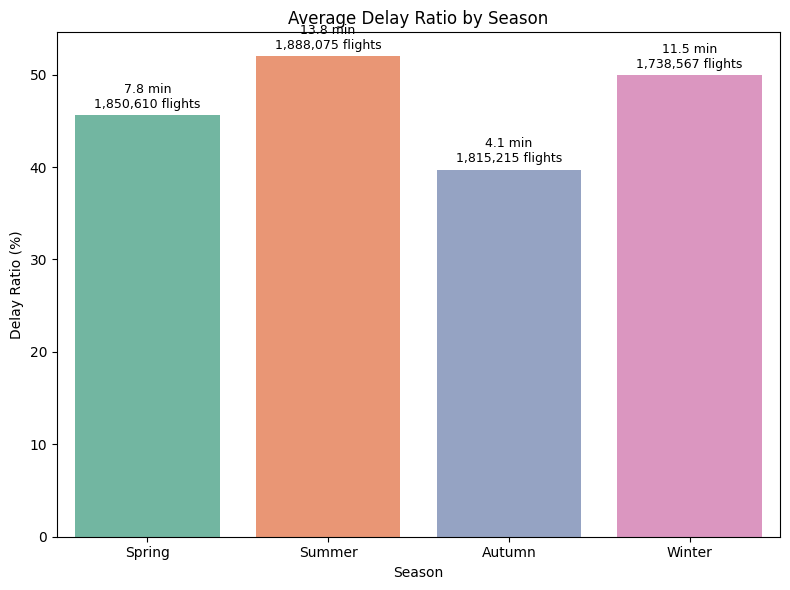

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define correct season order
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Pick a nice 4-color palette
palette_season = sns.color_palette("Set2")[:len(season_order)]

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=delay_pattern,
    x='Season',
    y='Delayed_Ratio',
    ci=None,
    palette=palette_season,
    order=season_order
)

plt.title('Average Delay Ratio by Season')
plt.ylabel('Delay Ratio (%)')
plt.xlabel('Season')

# Annotate each bar with Avg_Delay and Total_Flights
for p, season in zip(ax.patches, season_order):
    avg_delay = delay_pattern[delay_pattern['Season'] == season]['Avg_Delay'].mean()
    total_flights = delay_pattern[delay_pattern['Season'] == season]['Total_Flights'].sum()
    ax.annotate(
        f"{avg_delay:.1f} min\n{int(total_flights):,} flights",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


**Discussion**

The visualization presents clear seasonal variations in average flight delay.

1. Summer has the longest delays at 13.8 minutes, making it the most problematic season for air travel punctuality.

2. Winter follows closely with 11.5 minutes of average delays, ranking as the second-worst season. Arguably it might be worse than summer as the total number of flights taken off in winter is lower by approximately 150k.

3. Spring shows moderate delays at 7.8 minutes, significantly better than summer and winter but still noticeable.

4. Autumn performs best with only 4.1 minutes of average delays, making it the most reliable season for on-time flights.

/tmp/ipython-input-36-1027572911.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-36-1027572911.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


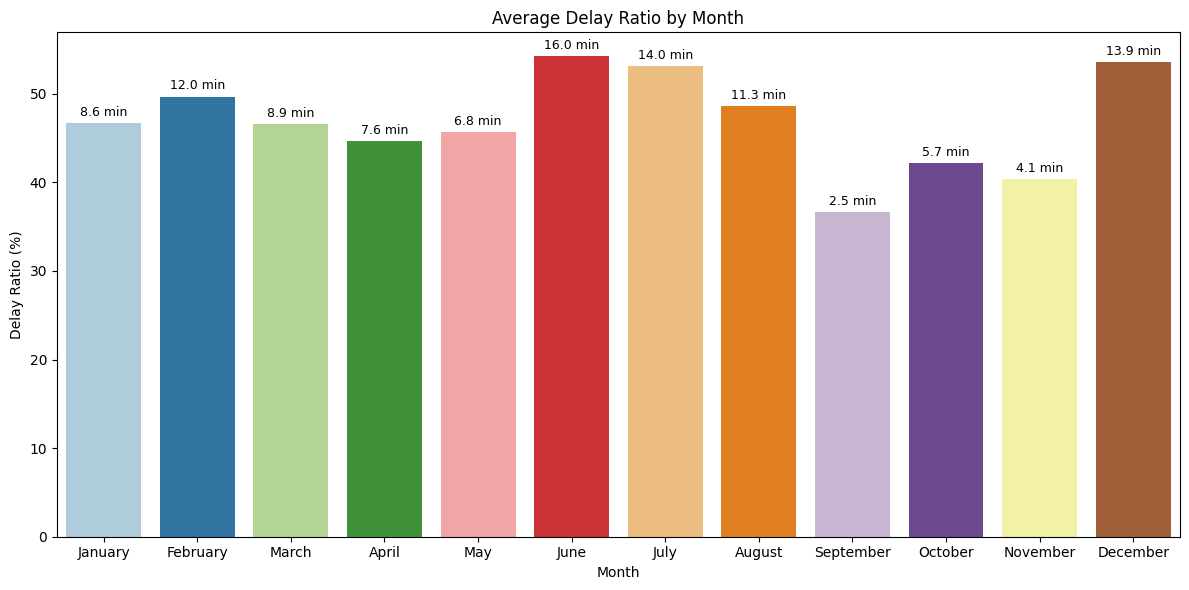

In [ ]:
# Define month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Palette
palette_month = sns.color_palette("Paired")[:len(month_order)]

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=delay_pattern,
    x='Month',
    y='Delayed_Ratio',
    ci=None,
    palette=palette_month,
    order=month_order
)

plt.title('Average Delay Ratio by Month')
plt.ylabel('Delay Ratio (%)')
plt.xlabel('Month')

# Annotate with Avg_Delay
for p, month in zip(ax.patches, month_order):
    avg_delay = delay_pattern[delay_pattern['Month'] == month]['Avg_Delay'].mean()
    ax.annotate(
        f"{avg_delay:.1f} min",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

**Discussion**

The monthly breakdown reveals significant fluctuations in flight delay times throughout 2007:

1. Peak Delay Months:

* June: Highest delays at 16.0 minutes
* July: 14.0 minutes
* December: 13.9 minutes

2. Best Performing Months:

* October (5.7 min)
* September (6.8 min)
* April (4.1 min) - the most punctual month

We can observe a summer surge in the pattern as the delays escalate from May to July. While also very significant delay in December which almost reach Summer's peak of June and July.

/tmp/ipython-input-65-577664544.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-65-577664544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


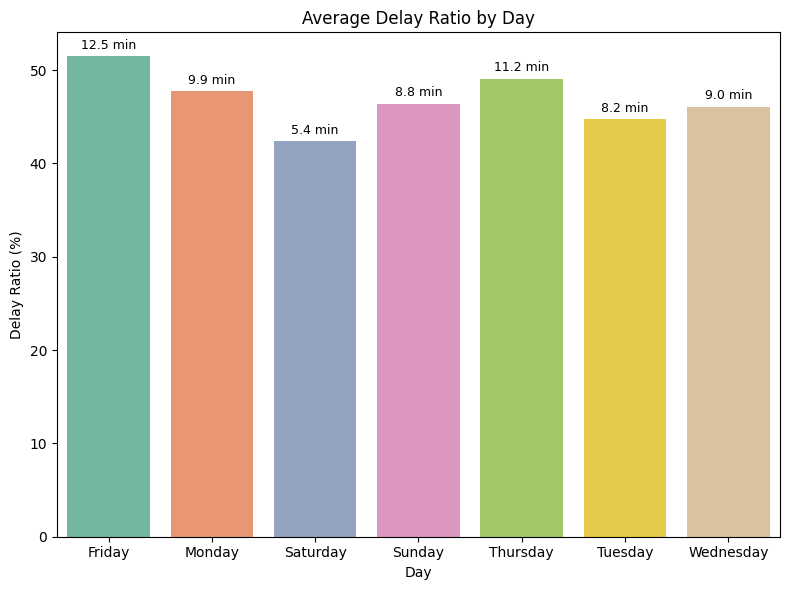

In [ ]:
# Choose a palette that matches your number of days
palette_day = sns.color_palette("Set2")[:delay_pattern['Day'].nunique()]

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=delay_pattern,
    x='Day',
    y='Delayed_Ratio',
    ci=None,
    palette=palette_day
)

plt.title('Average Delay Ratio by Day')
plt.ylabel('Delay Ratio (%)')
plt.xlabel('Day')

# Annotate with Avg_Delay
for p, day in zip(ax.patches, delay_pattern.groupby('Day')['Avg_Delay'].mean().index):
    avg_delay = delay_pattern[delay_pattern['Day'] == day]['Avg_Delay'].mean()
    ax.annotate(
        f"{avg_delay:.1f} min",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

**Discussion**

Highest Delay:
* Friday (12.5 min) and Thursday (11.2 min) have the worst delays.

Best Performing Day:
* Saturday has the lowest average delay of 5.4 minutes making it the best day to travel.

Weekdays (especially Thursday–Friday) see higher delays, while Weekends (Saturday–Sunday) have fewer delays, with Saturday being the best day for punctuality.

/tmp/ipython-input-66-3935536359.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-66-3935536359.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


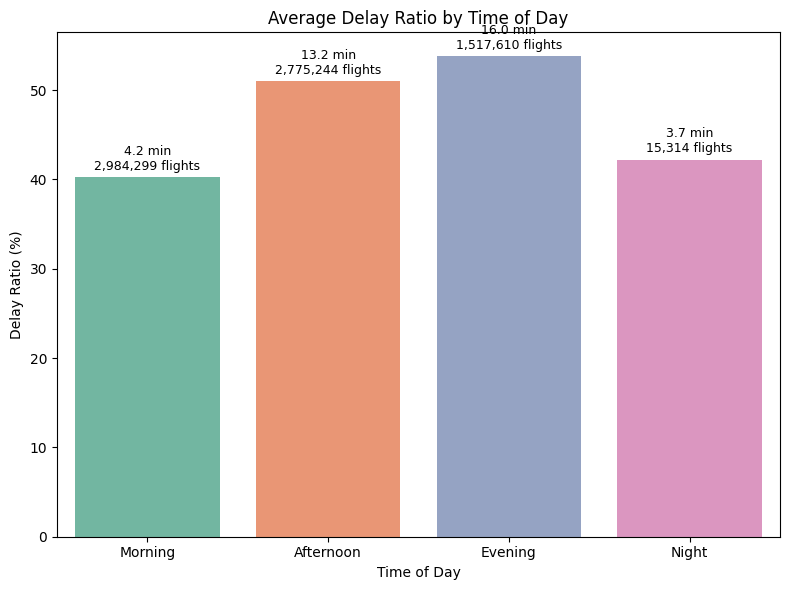

In [ ]:
# Define the correct order of Time
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Define a colorful palette with 4 colors
palette_time = sns.color_palette("Set2")[:len(time_order)]

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=delay_pattern,
    x='Time',
    y='Delayed_Ratio',
    ci=None,
    order=time_order,
    palette=palette_time
)

plt.title('Average Delay Ratio by Time of Day')
plt.ylabel('Delay Ratio (%)')
plt.xlabel('Time of Day')

# Annotate each bar with Avg_Delay and Total_Flights
for p, time in zip(ax.patches, time_order):
    avg_delay = delay_pattern[delay_pattern['Time'] == time]['Avg_Delay'].mean()
    total_flights = delay_pattern[delay_pattern['Time'] == time]['Total_Flights'].sum()
    ax.annotate(
        f"{avg_delay:.1f} min\n{int(total_flights):,} flights",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


**Discussion**

The highest delays are observed during the evening from 6pm to 11:59pm by 16 minutes, suggesting this is the most congested time for air travel. The lowest delay are observed during the night which is from 12am to 4:59am. However the total number of flight is considerably low, meaning there is not enough flight to show observed any potential delay occuring during these time. Hence the best available flying time with less delay will be during morning from 5am to 11:59am.

In [ ]:
column_names = ['Factor','Total_Delay','Delay_Ratio']
delay_factor = pd.read_csv('/DelayFactor.csv',header=None,names=column_names)

In [ ]:
delay_factor.head(10)

,Factor,Total_Delay,Delay_Ratio
0,LateAircraftDelay,38004942,51.253411
1,CarrierDelay,28808434,38.851013
2,NASDelay,28200746,38.031486
3,WeatherDelay,5739649,7.740483
4,SecurityDelay,176906,0.238575


/tmp/ipython-input-29-2425479881.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-29-2425479881.py:5: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.barplot(


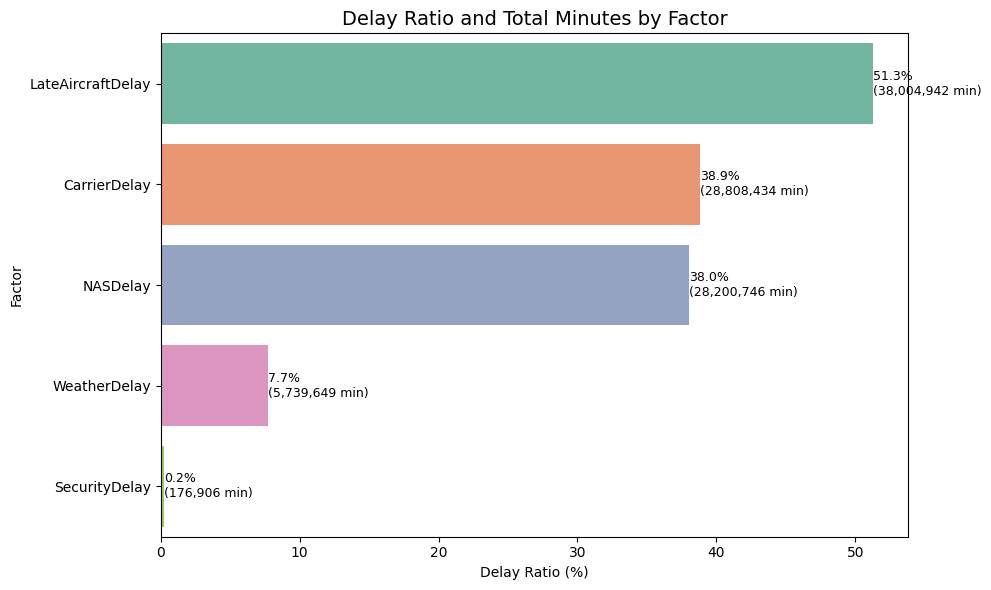

In [ ]:
# Define a palette
palette = sns.color_palette("Set2")

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=delay_factor,
    x='Delay_Ratio',
    y='Factor',
    orient='h',
    palette=palette
)

plt.title('Delay Ratio and Total Minutes by Factor', fontsize=14)
plt.xlabel('Delay Ratio (%)')
plt.ylabel('Factor')

# Annotate each bar
for i, p in enumerate(ax.patches):
    ratio = p.get_width()
    total_minutes = delay_factor.iloc[i]['Total_Delay']
    ax.annotate(
        f"{ratio:.1f}%\n({int(total_minutes):,} min)",
        (p.get_width(), p.get_y() + p.get_height()/2),
        ha='left', va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()


**Discussion**

Primary Delay Causes:

* Late Aircraft (51.3%) is the dominant factor, accounting for over half of all delays.

* Carrier (38.9%) and NAS (National Aviation System, 38.0%) delays are nearly tied as secondary contributors.

* Weather (7.7%) and Security (0.2%) play minor roles.

Total Delay Minutes:

* Late Aircraft caused 38 million minutes of delays—far exceeding other factors.

* Carrier and NAS delays each contributed ~28 million minutes.

* Weather delays, while impactful, were significantly lower (~5.7M minutes).

The data reveals that airline-controlled and systemic operational issues (Late Aircraft, Carrier, NAS) are the root causes of most delays—not external factors like weather. Strategic improvements in scheduling and logistics could significantly reduce overall delays.

In [ ]:
column_names = ['Season','Airport','Carrier','Total_Flights','Cancelled_Flights','Cancellation_Ratio']
cancellation = pd.read_csv('/CancellationAnalysis.csv',header=None,names=column_names)

In [ ]:
cancellation.head(10)

,Season,Airport,Carrier,Total_Flights,Cancelled_Flights,Cancellation_Ratio
0,Winter,Portland International Jetport,Northwest Airlines Inc.,2,1,50.00
1,Autumn,New Castle County,Atlantic Southeast Airlines,7,2,28.57
2,Winter,Chicago O'Hare International,Atlantic Southeast Airlines,14,4,28.57
3,Winter,Austin Straubel International,Mesa Airlines Inc.,189,47,24.87
4,Winter,Greater Peoria Regional,Pinnacle Airlines Inc.,61,15,24.59
5,Winter,Kalamazoo County,Skywest Airlines Inc.,265,61,23.02
6,Winter,Capital,Mesa Airlines Inc.,75,17,22.67
7,Winter,Aspen-Pitkin Co/Sardy,Mesa Airlines Inc.,368,79,21.47
8,Winter,Gunnison County,Skywest Airlines Inc.,28,6,21.43
9,Winter,Waterloo Municipal,Pinnacle Airlines Inc.,80,17,21.25


/tmp/ipython-input-51-3331326318.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


Text(0.5, 0, 'Carrier')

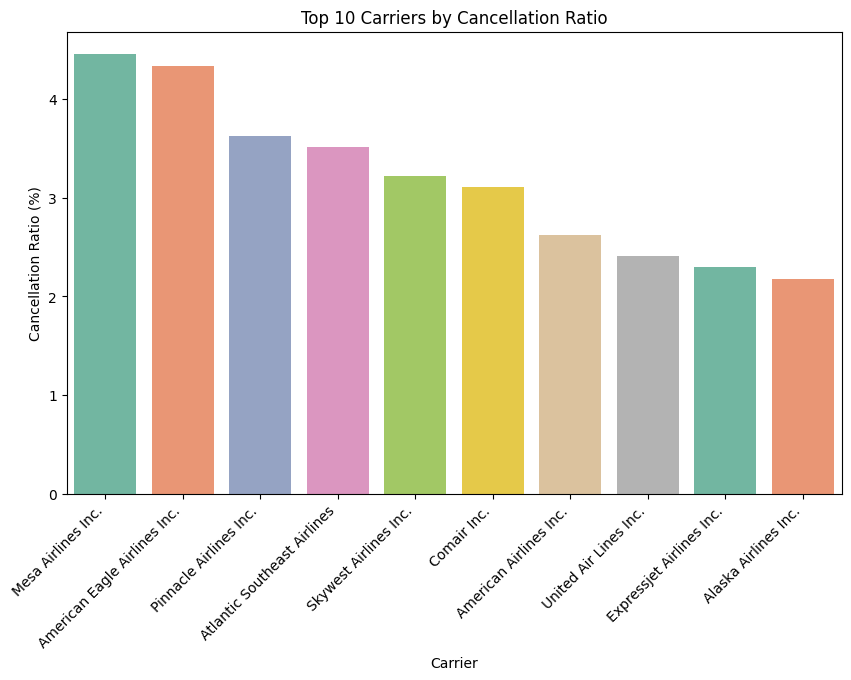

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take top 10 carriers with highest cancellation ratio
top10_carriers = (
    cancellation.groupby('Carrier')['Cancellation_Ratio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top10_carriers,
    x='Carrier',
    y='Cancellation_Ratio',
    palette='Set2'
)
plt.title('Top 10 Carriers by Cancellation Ratio')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cancellation Ratio (%)')
plt.xlabel('Carrier')

# Annotate each bar


**Discussion**

Regional Airlines Dominate Cancellations:

* Mesa Airlines, American Eagle, Pinnacle Airlines, and Atlantic Southeast Airlines (all regional carriers) have the highest cancellation ratios.
* This suggests regional flights are more prone to disruptions than mainline operations.


Mainline Carriers Perform Better:

* American Airlines, United Airlines, and Alaska Airlines (major carriers) appear lower on the list, indicating better operational reliability.
* ExpressJet and SkyWest (hybrid regional/mainline) show moderate cancellation rates.



Mesa Airlines leads in cancellations making this carrier as the worst performer.

/tmp/ipython-input-52-2162572916.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-52-2162572916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


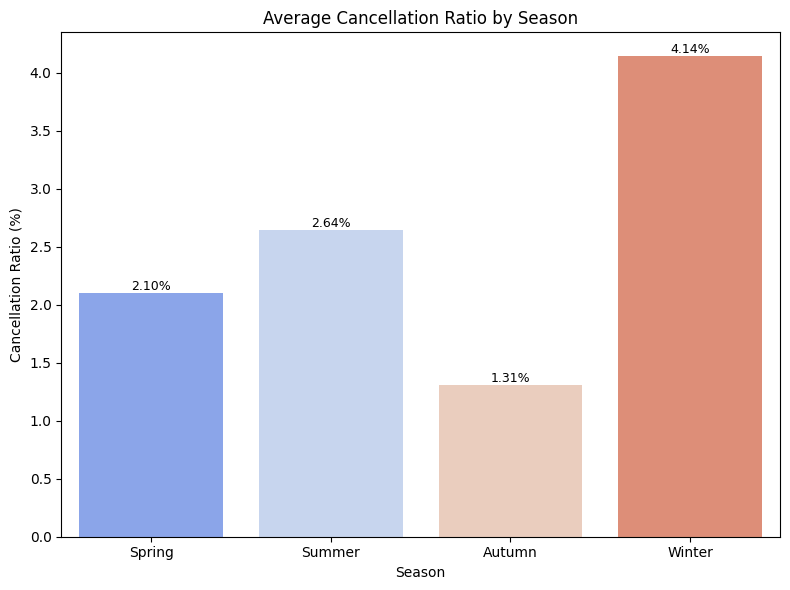

In [ ]:
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=cancellation,
    x='Season',
    y='Cancellation_Ratio',
    palette='coolwarm',
    order=season_order,
    ci=None   # <--- disables the error bar
)

plt.title('Average Cancellation Ratio by Season')
plt.ylabel('Cancellation Ratio (%)')
plt.xlabel('Season')

for p, season in zip(ax.patches, season_order):
    ratio = cancellation[cancellation['Season'] == season]['Cancellation_Ratio'].mean()
    ax.annotate(f"{ratio:.2f}%",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


**Discussion**

Winter has the worst cancellation rate which almost double the second season; Summer. This is potentially the harsher weather that usually takes place during the Winter season.

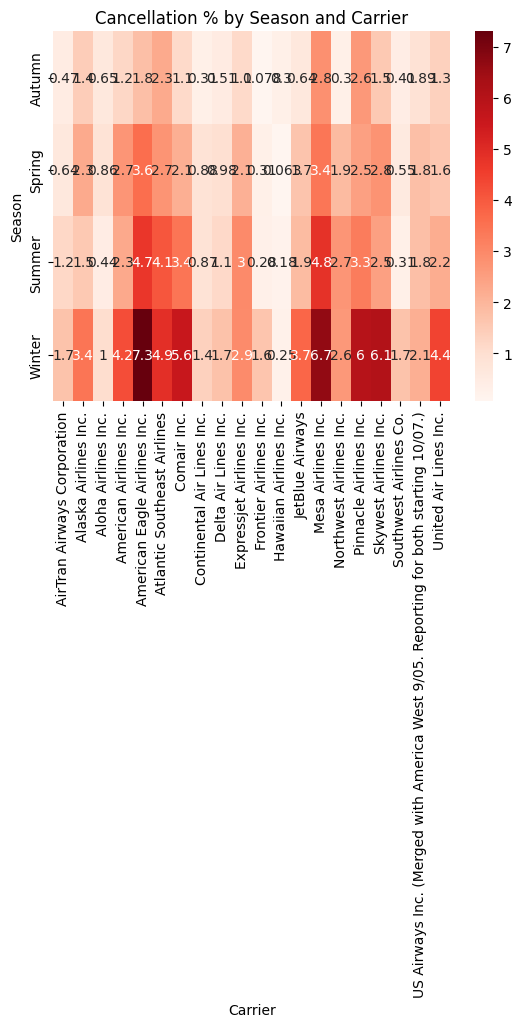

In [ ]:
# Pivot table: cancellation rate by Season and Carrier
pivot = cancellation.pivot_table(index="Season", columns="Carrier", values="Cancellation_Ratio")

sns.heatmap(pivot, annot=True, cmap="Reds")
plt.title("Cancellation % by Season and Carrier")
plt.show()

**Discussion**

The lowest cancellation as per season can be observed in Autumn. While the worst season is Winter and followed by Summer. However we can see Mesa Airline and Pinnacle Airline perform badly in all season backed by the earlier ranking of cancellation rate. The American Eagle arguably perform better during the Autumn season but the worst carrier performance during the Winter season awarding them with the second place as the carrier with highest cancellation ratio.

In [ ]:
column_names = ['Carrier','Avg_Delay']
carrier_performance = pd.read_csv('/CarrierPerformance.csv',header=None,names=column_names)

In [ ]:
carrier_performance.head(10)

,Carrier,Avg_Delay
0,Atlantic Southeast Airlines,17.195729
1,American Airlines Inc.,14.441869
2,JetBlue Airways,13.439936
3,Comair Inc.,13.135051
4,American Eagle Airlines Inc.,12.992794
5,United Air Lines Inc.,12.753122
6,Northwest Airlines Inc.,12.559142
7,US Airways Inc. (Merged with America West 9/05...,11.527269
8,Mesa Airlines Inc.,10.963476
9,Continental Air Lines Inc.,10.269463


/tmp/ipython-input-62-3636868071.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


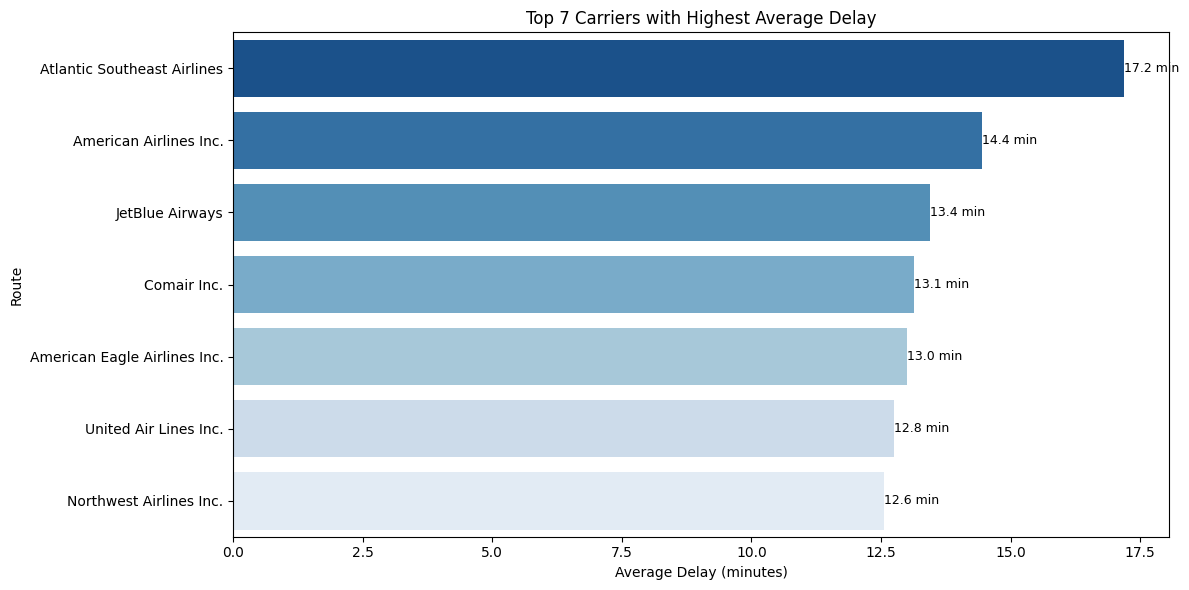

In [ ]:
# Take top 10 routes with highest avg delay
top7_carriers = (
    carrier_performance.groupby('Carrier')['Avg_Delay']
    .mean()
    .sort_values(ascending=False)
    .head(7)
    .reset_index()
)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top7_carriers,
    x='Avg_Delay',
    y='Carrier',
    palette='Blues_r'
)

plt.title('Top 7 Carriers with Highest Average Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')

# Annotate each bar
for p in ax.patches:
    ax.annotate(f"{p.get_width():.1f} min",
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

**Discussion**

Worst-Performing Airlines:

* Atlantic Southeast Airlines (17.2 min) leads in delays, followed by American Airlines (14.4 min) and JetBlue (13.4 min).
* Regional carriers (Comair, American Eagle) and major airlines (United, Northwest) are both represented.

Delay Range:

* Delays range from 12.6 min (Northwest) to 17.2 min (Atlantic Southeast)—a 4.6-minute spread among the top offenders.

Regional vs. Mainline:

* 3/7 are regional airlines (Atlantic Southeast, Comair, American Eagle), reinforcing their operational challenges.
* 4/7 are major carriers, indicating systemic issues even for larger airlines.


American Airlines and its subsidiaries (American Eagle) both are in the top 7 list, suggesting network-wide inefficiencies. JetBlue, a low-cost carrier, performs worse than legacy airlines like United and Northwest.


In [ ]:
column_names = ['Route','Avg_Delay']
route_performance = pd.read_csv('/RoutePerformance.csv',header=None,names=column_names)

In [ ]:
route_performance.head(10)

,Route,Avg_Delay
0,ONT-IAD,370.0
1,ELP-MFE,316.0
2,ACY-MYR,252.0
3,JAX-CMH,217.0
4,DCA-PLN,210.0
5,AVP-BUF,195.0
6,JFK-GSO,181.0
7,GSP-RSW,175.0
8,PIT-PVD,158.0
9,JFK-SAV,157.0


/tmp/ipython-input-59-3871568716.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


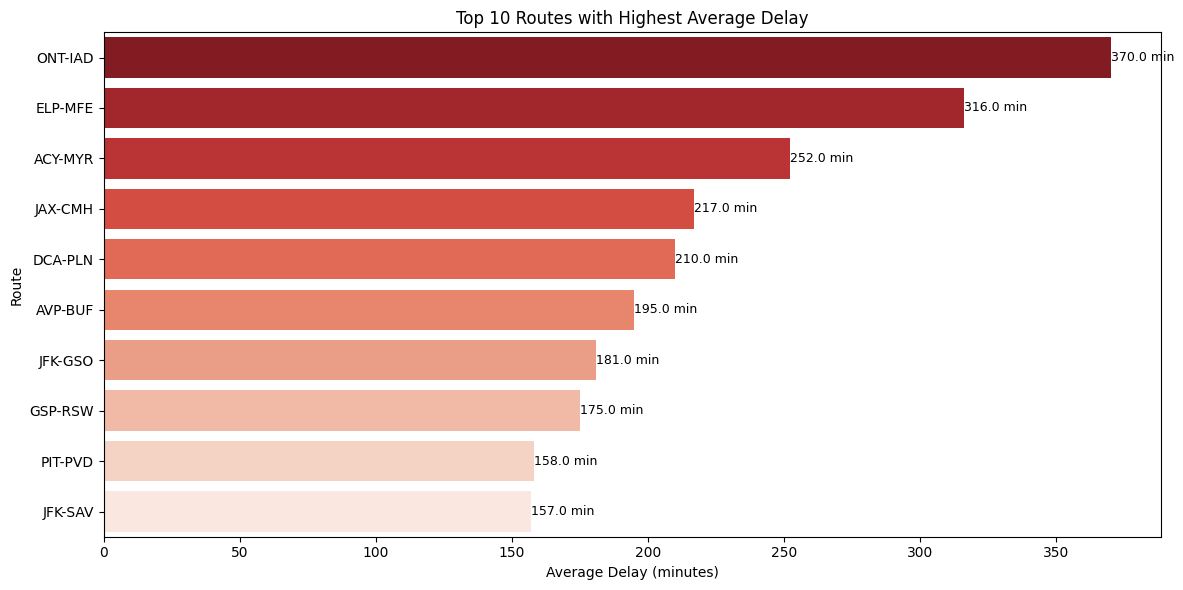

In [ ]:
# Take top 10 routes with highest avg delay
top10_routes = (
    route_performance.groupby('Route')['Avg_Delay']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top10_routes,
    x='Avg_Delay',
    y='Route',
    palette='Reds_r'
)

plt.title('Top 10 Routes with Highest Average Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route')

# Annotate each bar
for p in ax.patches:
    ax.annotate(f"{p.get_width():.1f} min",
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

**Discussion**

Extreme Delays:

* ONT-IAD, Ontario - Washington (217 min) and ELP-MFE, Texas - Texas (210 min) face 3.5+ hour delays on average.
* All routes exceed 150 minutes, far worse than carrier-level delays.

Route Characteristics:

* Mostly short-to-medium-haul (e.g., JAX-CMH; Florida-Ohio, AVP-BUF; Pennsylvania-New York).
* Many connect smaller airports [ACY(New Jersey), MYR(South Carolina), PLN(Michigan)] or secondary hubs [JFK(New York), DCA(Virginia)].

Geographic Clusters:

* Northeast Corridor (DCA, JFK, PVD) and Florida (RSW, SAV) appear frequently.
* Texas-Mexico border (ELP-MFE) is notably problematic.


Smaller airports dominate the top route ranking, no transcontinental or international routes, suggesting short-haul flights are more delay-prone.

**Conclusion**

The flight delay analysis reveals clear patterns across seasons, times, carriers, and routes. Summer and winter show the worst seasonal delays (13.8 and 11.5 minutes), while Fridays and afternoons face the highest weekday/time-of-day disruptions. Regional airlines (e.g., Atlantic Southeast, Mesa) and major carriers (e.g., American, JetBlue) dominate delay rankings, with cascading "late aircraft" delays being the top systemic cause (51.3% of all delays). Notably, short-haul routes (e.g., ONT-IAD, ELP-MFE) suffer extreme delays (3+ hours), often due to congestion at small airports or hub dependencies. Optimal travel times include autumn flights, Sunday departures, and nighttime operations, which show significantly fewer delays. This analysis will help travellers to plan their journey better.